# Implementing and Running REINFORCE (episodic)
### Page 328, Sutton's book

<img src="https://github.com/FredAmouzgar/RL-sutton/raw/master/ch13-PG_methods/REINFORCE%20(TF2.0)/images/Ch13_RL_Sutton-REINFORCE-PG_Control.jpg" width=800>

## Training CartPole Environment

In [1]:
import gym
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from agent import Agent
from tqdm import tqdm

%matplotlib inline

In [2]:
env = gym.make("CartPole-v1")
agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.n, env_name=env.spec.id) #4 ,2

print(f"env.action_space.n: {env.action_space.n}\nenv.observation_space.shape: {env.observation_space.shape}")

env.action_space.n: 2
env.observation_space.shape: (4,)


In [3]:
from time import sleep
import numpy as np
from IPython.display import clear_output

def render(img, status=False, rewards=[], reward_chart=True):
    message = "Episode over" if done else ""
    if reward_chart:
        fig, (ax1, ax2) = plt.subplots(1, 2)
    else:
        fig, ax1 = plt.subplots(1, 1)
    ax1.axis("off")
    _ = ax1.imshow(img)
    if reward_chart:
        _ = ax2.plot(rewards)
    
    plt.title(message)
    plt.show()
    clear_output(wait=True)

In [4]:
episodes = 500

all_rewards = []
for i in tqdm(range(episodes)):
    state = env.reset()
    agent.new_episode()
    done = False

    rewards = []
    while not done:
        # TODO: Agent has to choose an action here
        action = agent.act(state)
        state_, reward, done, _ = env.step(action)
        rewards.append(reward)
        agent.learn(state, action,state_,reward,done)
        if i % 100 == 0:
            render(env.render(mode="rgb_array"),status=done, rewards=all_rewards)
        state = state_
        if done:
            if all_rewards != [] and np.max(all_rewards) < np.sum(rewards): # Saving the best performing model which
                agent.save()                                                # achieved a reward more than all recorded by far
            all_rewards.append(np.sum(rewards))
env.close()

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [08:47<00:00,  1.06s/it]


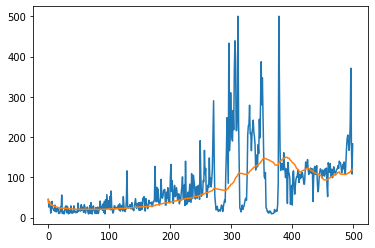

In [5]:
def get_average_rewards(all_rewards):
    average_rewards = []
    temp_rewards = []
    for i in range(0,500):
        temp_rewards.append(all_rewards[i])
        if len(temp_rewards) > 100:
            temp_rewards.pop(0)
        average_rewards.append(np.mean(temp_rewards))
    return average_rewards

plt.plot(all_rewards)
plt.plot(get_average_rewards(all_rewards))
plt.show()

# Watch a Smart Agent - CardPole (?)

Not a very smart agent, though. It regularly backslides.

In [6]:
import gym
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from agent import Agent
from tqdm import tqdm

%matplotlib inline

#######
from time import sleep
import numpy as np
from IPython.display import clear_output

def render(img, status=False, rewards=[], reward_chart=True):
    message = "Episode over" if done else ""
    if reward_chart:
        fig, (ax1, ax2) = plt.subplots(1, 2)
    else:
        fig, ax1 = plt.subplots(1, 1)
    ax1.axis("off")
    _ = ax1.imshow(img)
    if reward_chart:
        _ = ax2.plot(rewards)
    
    plt.title(message)
    plt.show()
    clear_output(wait=True)
#########

env = gym.make("CartPole-v1")
agent = Agent(state_size=4, action_size=2, env_name=env.spec.id)
agent.load()

episodes = 2

all_rewards = []
for i in tqdm(range(episodes)):
    state = env.reset()
    agent.new_episode()
    done = False

    rewards = []
    while not done:
        # TODO: Agent has to choose an action here
        action = agent.act(state)
        state_, reward, done, _ = env.step(action)
        rewards.append(reward)
        #agent.learn(state, action,state_,reward,done)
        render(env.render(mode="rgb_array"),status=done, rewards=all_rewards, reward_chart=False)
        state = state_
        if done:
            all_rewards.append(np.sum(rewards))

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:44<00:00, 22.02s/it]


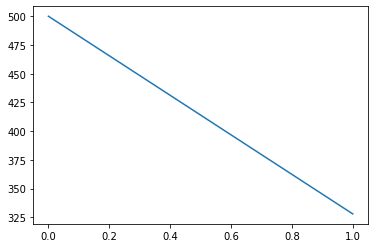

In [7]:
_ = plt.plot(all_rewards)
env.close()

## Training LunarLander Environment

In [1]:
import gym
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from agent import Agent
from tqdm import tqdm

%matplotlib inline

env = gym.make("LunarLander-v2")
agent = Agent(state_size=len(env.observation_space.high), action_size=env.action_space.n, env_name=env.spec.id) #8 ,4

print(f"env.action_space.n: {env.action_space.n}\nenv.observation_space.shape: {len(env.observation_space.high)}\nENV Name: {env.spec.id}")

env.action_space.n: 4
env.observation_space.shape: 8
ENV Name: LunarLander-v2


In [ ]:
from time import sleep
import numpy as np
from IPython.display import clear_output

def render(img, status=False, rewards=[], reward_chart=True):
    message = "Episode over" if done else ""
    if reward_chart:
        fig, (ax1, ax2) = plt.subplots(1, 2)
    else:
        fig, ax1 = plt.subplots(1, 1)
    ax1.axis("off")
    _ = ax1.imshow(img)
    if reward_chart:
        _ = ax2.plot(rewards)
    
    plt.title(message)
    plt.show()
    clear_output(wait=True)
    
episodes = 500

all_rewards = []
for i in tqdm(range(episodes)):
    state = env.reset()
    agent.new_episode()
    done = False

    rewards = []
    while not done:
        # TODO: Agent has to choose an action here
        action = agent.act(state)
        state_, reward, done, _ = env.step(action)
        rewards.append(reward)
        agent.learn(state, action,state_,reward,done)
        if i % 100 == 0:
            render(env.render(mode="rgb_array"),status=done, rewards=all_rewards)
        state = state_
        if done:
            if all_rewards != [] and np.max(all_rewards) < np.sum(rewards):
                agent.save()
            all_rewards.append(np.sum(rewards))
env.close()

 28%|██████████████████████▋                                                         | 142/500 [15:10<39:20,  6.59s/it]

In [ ]:
def get_average_rewards(all_rewards):
    average_rewards = []
    temp_rewards = []
    for i in range(0,500):
        temp_rewards.append(all_rewards[i])
        if len(temp_rewards) > 100:
            temp_rewards.pop(0)
        average_rewards.append(np.mean(temp_rewards))
    return average_rewards

plt.plot(all_rewards)
plt.plot(get_average_rewards(all_rewards))
plt.show()

# Watch a Smart Agent (?) - LunarLander

In [ ]:
import gym
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from agent import Agent
from tqdm import tqdm

%matplotlib inline

#######
from time import sleep
import numpy as np
from IPython.display import clear_output

def render(img, status=False, rewards=[], reward_chart=True):
    message = "Episode over" if done else ""
    if reward_chart:
        fig, (ax1, ax2) = plt.subplots(1, 2)
    else:
        fig, ax1 = plt.subplots(1, 1)
    ax1.axis("off")
    _ = ax1.imshow(img)
    if reward_chart:
        _ = ax2.plot(rewards)
    
    plt.title(message)
    plt.show()
    clear_output(wait=True)
#########

env = gym.make("LunarLander-v2")
agent = Agent(state_size=len(env.observation_space.high), action_size=env.action_space.n, env_name=env.spec.id)
agent.load()

episodes = 2

all_rewards = []
for i in tqdm(range(episodes)):
    state = env.reset()
    agent.new_episode()
    done = False

    rewards = []
    while not done:
        # TODO: Agent has to choose an action here
        action = agent.act(state)
        state_, reward, done, _ = env.step(action)
        rewards.append(reward)
        #agent.learn(state, action,state_,reward,done)
        render(env.render(mode="rgb_array"),status=done, rewards=all_rewards, reward_chart=False)
        state = state_
        if done:
            all_rewards.append(np.sum(rewards))

_ = plt.plot(all_rewards)
env.close()

<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>

# Some Tests Before Development:

In [3]:
import gym
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from agent import Agent
from tqdm import tqdm
from agent import Agent

#agent = Agent(state_size=4, action_size=2)
env = gym.make("LunarLander-v2")
env

<TimeLimit<LunarLander<LunarLander-v2>>>

In [6]:
print("env.obs.n:", len(env.observation_space.high), env.observation_space.low)
print("env.action_space.n", env.action_space.n)
env.action_space.sample()

env.obs.n: 8 [-inf -inf -inf -inf -inf -inf -inf -inf]
env.action_space.n 4


3

In [13]:
env.spec.id

'CartPole-v1'

In [4]:
env = gym.make("Pendulum-v0")
#print(f"env.action_space.n: {env.action_space.n}\nenv.observation_space.shape: {env.observation_space.shape}")
s = env.reset()
#env.render()
print(s)
env.step([1])

[-0.89592973  0.44419581  0.41372887]


(array([-0.91494179,  0.40358583,  0.89687573]), -7.207573732139825, False, {})

In [13]:
env.step([-2.5])
env.render()

True

In [14]:
env.close()

In [ ]:
s = s.reshape(1,4)
s = tf.convert_to_tensor(s, dtype=tf.float32)
print(s.shape)
print(s)

action_probs = agent.actor(s)
print(action_probs)

agent.critic(s)

In [ ]:
s = env.reset()
agent.act(s)

In [ ]:
for i in range(10):
    print(tf.random.categorical(action_probs, 1))
    print(agent.act(s))

In [ ]:
action_probs

In [ ]:
env.step(0)

In [ ]:
1 - True

In [ ]:
tf.__version__

In [ ]:
import tensorflow_probability as tfp

In [ ]:
dist = tfp.distributions.Categorical(probs=action_probs)

In [ ]:
dist.log_prob(action)

In [ ]:
weights = agent.critic.weights
print(weights[3].shape)
#for w in weights[0]:
#    print(w)

In [1]:
import gym
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from agent import Agent
from tqdm import tqdm

%matplotlib inline

env = gym.make("CartPole-v1")
agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.n, env=env, env_name=env.spec.id) #4 ,2

print(f"env.action_space.n: {env.action_space.n}\nenv.observation_space.shape: {env.observation_space.shape}")

env.action_space.n: 2
env.observation_space.shape: (4,)


In [2]:
r, log_probs = agent.generate_episode(max_step=300)

In [3]:
agent.learn(r, log_probs)

ValueError: No gradients provided for any variable: ['dense/kernel:0', 'dense/bias:0', 'dense_1/kernel:0', 'dense_1/bias:0', 'dense_2/kernel:0', 'dense_2/bias:0'].

In [3]:
log_probs

[-0.69338566,
 -0.67613894,
 -0.65784746,
 -0.6393634,
 -0.7720389,
 -0.75152296,
 -0.73182464,
 -0.6738868,
 -0.6537732,
 -0.75708807,
 -0.6503558,
 -0.7617342,
 -0.7431185,
 -0.66346604,
 -0.7493002,
 -0.65752006,
 -0.75665784,
 -0.6507561,
 -0.6257417,
 -0.7932427]

In [4]:
print(r)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [5]:
a = [0.99 ** i for i in range(len(r))]
a

[1.0,
 0.99,
 0.9801,
 0.970299,
 0.96059601,
 0.9509900498999999,
 0.941480149401,
 0.9320653479069899,
 0.9227446944279201,
 0.9135172474836408,
 0.9043820750088044,
 0.8953382542587164,
 0.8863848717161292,
 0.8775210229989678,
 0.8687458127689782,
 0.8600583546412884,
 0.8514577710948755,
 0.8429431933839268,
 0.8345137614500875,
 0.8261686238355866]

In [6]:
import numpy as np
len(a)

20

In [7]:
G = np.array(a) * np.array(r)
G

array([1.        , 0.99      , 0.9801    , 0.970299  , 0.96059601,
       0.95099005, 0.94148015, 0.93206535, 0.92274469, 0.91351725,
       0.90438208, 0.89533825, 0.88638487, 0.87752102, 0.86874581,
       0.86005835, 0.85145777, 0.84294319, 0.83451376, 0.82616862])

In [8]:
for i in range(len(G)):
    print(G[i:].sum())

18.20930624027691
17.20930624027691
16.21930624027691
15.239206240276912
14.268907240276912
13.308311230276914
12.357321180376914
11.415841030975914
10.483775683068924
9.561030988641003
8.64751374115736
7.743131666148557
6.847793411889841
5.961408540173711
5.083887517174743
4.215141704405765
3.3550833497644765
2.503625578669601
1.660682385285674
0.8261686238355866
